# Урок 6. Задача lookalike (Positive Unlabeled Learning)#

<img src='https://drive.google.com/uc?export=view&id=1tgPJoFNVVULBpB8DcT2O0AYnSgZolbEH'>

Пример задачи - один клиент в магазине не купил корм для кошек, но если мы ему скажем о корме, может ли он его купить?

Программа урока:
1. Теоретическая часть:

     - Задача обучения с учителем (повторение)
     - Примеры кейсов, когда разметка содержит только наблюдения положительного класса
     - Какие задачи не относятся к lookalike


2. Практическая часть
    - Метод решения random negative sampling
    - Метод 2-step approach
    - Метод spy
    - Сравнение методов между собой на датасете, для которого метки известны
    - Сравнение лучшего метода с моделью, построенной на данных, для которых известны метки всех классов

<img src='https://drive.google.com/uc?export=view&id=1EqTtbS848-pfoWA-MTV8scVmbYyoB0Sy' width=800>

Т.е в "стандартной" постановке задачи обучения с учителем у нас есть разметка.

Например, если мы решаем задачу бинарной классификации, то у нас есть объекты с метками обоих классов (positive/negative).

На практике часто бывает так, что мы сравнительно легко можем определить объекты одного класса (дпопустим, мы легко понимаем, какие объекты можно назвать положительными), но при этом возникают сложности с определением объектов другого класса (негативы).

<img src='https://drive.google.com/uc?export=view&id=1begp9Rz9FI0DZ1Ff_jmcYRlYsK9SIXHB'>

Примеры задач:

- Продвижение услуг и приложений
- Выделение сегмента пользователей, которые совершат нужное нам целевое действие

<img src='https://drive.google.com/uc?export=view&id=1FoFble2hEnexFOpIbQWyMheFv92Tlieh'>

a) Выделяем только группу позитивно размеченного класса. Хорошей похожести вряд ли найдем, т.к. ищем похожих только в одной группе

b) Строим более интересную границу, чтобы обобщить неразмеченные объекты и интерпретировать их не как отрицание, а как положительный объект.

### Более формальное описание задачи

1. оценивается вероятность того, что пользователь совершит некоторое целевое действие (приобретение подписки, установка или регистрация в приложении и т.д)
2. У нас есть только те, кто совершил это действие - это positives. При этом нет определения того, что такое negative. Все, кроме P - Unlabeled (U)
3. Нам нужно как-то собрать выборку и обучить модель, которая будет отличать P от N 


Обучение на PU данных нетривиально. Существует 2 возможных объяснения, почему конкретный объект не имеет метки класса:
1. это объект класса 0 (True negative)
2. это объект класса 1, но просто неразмеченный

## PU learning (варианты решения)


1. Random negative sampling
2. 2-step approach
3. SPY
4. … (много других)

### 1. Random negative sampling

Другое название random negative sampling -> The Selected Completely At Random (SCAR)

- Семплируем подможножество из U и присваиваем им метку 0 (множество N)
- Строим бинарный классификатор, который учится различать N от P
- Используем полученный классификатор без дополнительных телодвижений


Здесь не можем строить точную модель, т.к. не уверены в своем множестве N, так что нужно позволить модели ошибаться.

- random negative sampling основан на предположении, что размеченные данные являются независимыми и одинаково распределенными
- random negative sampling очень популярен, но главным образом благодаря тому, что проблема в итоге сводится к задаче бинарной классификации

Ниже на картинке пример, если размеченные данные (Labeled Positive) выбраны независимо и равновероятно из генеральной совокупности (множества всех позитивов - Unlabeled Positive)

<img src='https://drive.google.com/uc?export=view&id=1iLurg0reVcqyb1UJqnQDVLY2vk9az6jo' width=600>

Ниже на картинке пример, где мы уже видим, что семплирование смещено. 

<img src='https://drive.google.com/uc?export=view&id=17vzbOt7QrAEA2AN6lAVTkE4p36TEfFPC' width=600>

RNS - одностадийный и слишком простой.

### 2-step approach

<img src='https://drive.google.com/uc?export=view&id=1KQKwTm_Wx68SLal456Bk8oVMtgkgsRjf' width=600>

#### Или словами:

1. определяем RN (reliable negatives) (по факту это делаем шаг Random Negative Sampling'a).
2. Используем метод обучения с учителем для обучения классификатора на P, RN
3. Сделаем предсказание этой моделью на всем множестве U, проскорим и выберем топ объектов, которые вероятней всего принадлежат множеству N.
4. Обучаем еще раз модель на P и проскоренных N из RN.
5. Можно повторять шаги несколько раз.

### 3. Алгоритм Spy


<img src='https://drive.google.com/uc?export=view&id=1MYczAPDN0rlCyvf2fFS4_KaytGHreTGt'>

- Семплируем множество S из P и помещаем их в U
- S - это шпионы (позитивные примеры)
- Обучение классификатор на P-S (метка 1) и UuS (метка 0)
- Смотрим, какие вероятности получили элементы S, чтобы определить порог для выбора RN (надежные негативы)


### Разметить все неразмеченные данные как Negatives

Но конечно такой метод на практике почти не используется, хотя и очень прост и понятен.

## Пример 1

1. сгенерируем игрушечный датасет из двух множеств так, чтобы они немного пересекались с помощью https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

2. Нарисуем график с нашими и данными. Часть данных (250 примеров) размечена как позитивы, остальные - неразмечены

labeled samples: 250


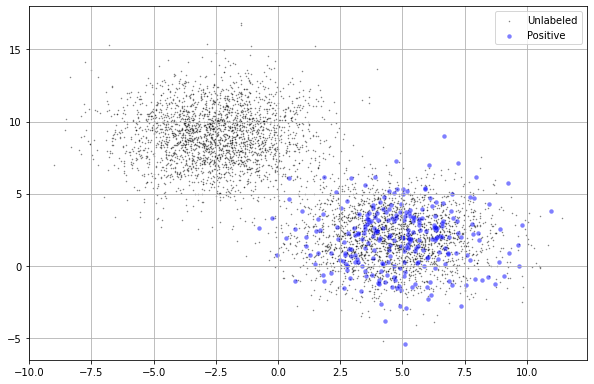

In [8]:
N = 5000
known_labels_ratio = 0.1
X, y = make_blobs(n_samples=N, centers=2, 
                  n_features=2, shuffle=True, 
                  cluster_std=2,
                #   cluster_std=5,
                  random_state=42)

rp = np.random.permutation(int(N/2))

data_P = X[y == 1][rp[:int(len(rp) * known_labels_ratio)]]

data_U = np.concatenate(
    (X[y == 1][rp[int(len(rp) * known_labels_ratio):]], X[y == 0]),
    axis=0)

print(f"labeled samples: {data_P.shape[0]}")

plt.figure(figsize=(10, 6.5))
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', lw=1, s=1, alpha=0.5, label='Unlabeled')
plt.scatter(data_P[:, 0], data_P[:, 1], c='b', marker='o', lw=0, s=20, alpha=0.5, label='Positive')
plt.grid()
plt.legend();

3. Обучим 1000 деревьев решений, используя bagging
4. Предсказания делаем oob (out-of-the-bag) и затем для каждого примера мы все прогнозы усредняем

Что такое bagging (ссылка - https://en.wikipedia.org/wiki/Bootstrap_aggregating)

<img src='https://drive.google.com/uc?export=view&id=1Qcpg4-KWmDV8hL_DKdULd5580bQETaoy'>

In [9]:
NP = data_P.shape[0]
NU = data_U.shape[0]

num_trees = 1000
train_label = np.zeros(shape=(NP+NP,))
train_label[:NP] = 1.0
n_oob = np.zeros(shape=(NU,))
f_oob = np.zeros(shape=(NU, 2))

for i in range(num_trees):
    # Bootstrap resample
    bootstrap_sample = np.random.choice(np.arange(NU), replace=True, size=NP)
    
    # Positive set + bootstrapped unlabeled set
    data_bootstrap = np.concatenate((data_P, data_U[bootstrap_sample, :]), axis=0)

    # Train model
    model = DecisionTreeClassifier(class_weight='balanced')
    model.fit(data_bootstrap, train_label)
    
    # Index for the out of the bag (oob) samples
    idx_oob = sorted(set(range(NU)) - set(np.unique(bootstrap_sample)))
    
    # Transductive learning of oob samples
    f_oob[idx_oob] += model.predict_proba(data_U[idx_oob])
    n_oob[idx_oob] += 1

predict_proba = f_oob[:, 1] / n_oob

5. наконец, посчитаем Precision, Recall и оптимальный порог и посмотрим, как наш алгоритм справился (ведь мы для наших данных знаем реальные метки классов)

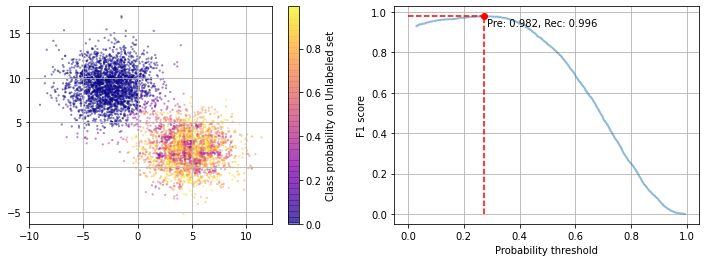

In [10]:
# Plot the class probabilities for the unlabeled samples
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
sp= ax1.scatter(data_U[:, 0], data_U[:, 1], c=predict_proba, 
                lw=0, s=5, alpha=0.5, cmap=plt.cm.plasma, label='unlabeled')
plt.grid()
plt.colorbar(sp, label='Class probability on Unlabeled set')

true_labels = np.zeros(shape=(data_U.shape[0]))
true_labels[:int(len(rp) * (1.0 - known_labels_ratio))] = 1.0

precision, recall, th = precision_recall_curve(true_labels, predict_proba)
ax2 = fig.add_subplot(1, 2, 2)
f1s = precision[:-1] * recall[:-1]
ax2.plot(th, f1s, lw=2, alpha=0.5)

best_th = np.argmax(f1s)
ax2.plot(th[best_th], f1s[best_th], c='r', marker='o')
ax2.plot([th[best_th], th[best_th]], [0.0,f1s[best_th] ], 'r--')
ax2.plot([0.0, th[best_th]], [f1s[best_th], f1s[best_th] ], 'r--')
ax2.annotate(f'Pre: {precision[best_th]:.3f}, Rec: {recall[best_th]:.3f}', 
             xy=(th[best_th]+ 0.01, f1s[best_th]-0.05))
ax2.set_ylabel('F1 score')
ax2.set_xlabel('Probability threshold')
plt.grid()


Видим, что наши данные очень неплохо разделяются и хорошие показатели pr/rec.

Получившуюся модель можно использовать больше даже никак конечная модель, а как инструмент разметки нашей базы.

## Пример 2

Есть аудитория магазина и покупки за некоторый период

Датасет предметов (товаров):

In [11]:
!wget 'https://drive.google.com/uc?export=download&id=1TRYfDdFMHrSS6HT4anx_b9P2hxUDsvxt' -O items.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [13]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt



In [ ]:

items = pd.read_csv("items.csv")
print(f"Num unique items: {items.shape[0]}\nNum unique categories: {len(items['item_type'].unique())}")
items.head(3)

Покупки

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1XngPllkMD71ENaKetD9PuihFtJUWmpea' -O purchases.csv

In [ ]:
purchases = pd.read_csv("purchases.csv")
print(f"Num unique users: {len(purchases['user_id'].unique())}")
purchases.columns = ['user_id', 'Name']
purchases.head(3)

**Задача: Нужно провести акцию с предложением чая (со скидкой) 5 тысячам пользователей (всего у нас 32 тысячи)**

Варианты решения задачи:
1. Случайная выборка
2. Что-то более умное (сведем все к задаче lookalike)

Возможный алгоритм:
1. Выбираем по базе тех, кто покупал чай ранее - это наши позитивы 
2. Решаем задачу бинарной классификации (lookalike)
3. Скорим нашу аудиторию
4. Берем топ 5 тысяч
5. Запускаем рекламную кампанию

Далее дожидаемся окончания кампании и анализируем результаты

Для начала поджойним предметы и покупки

In [ ]:
purchases = pd.merge(purchases, items)
purchases.head(3)

Теперь посмотрим сколько у нас было пользователей, покупавших ранее чай

In [ ]:
len(purchases[purchases['item_type'] == 'чай']['user_id'].unique())

1360 любителей чая (нам нужно 5000 по условию задачи). 

Давайте разметим наш датасет (все кто покупал чай в прошлом - метка 1) - это класс 1. 

Мы предполагаем, что людям со схожими на класс 1 предпочтениями и покупками (но не покупавшие чай), также понравится и чай. На этом предположении мы и двигаемся дальше. 

In [ ]:
purchases['y'] = purchases['item_type'].apply(lambda x: 1 if x == 'чай' else 0)
purchases.head()

Попробуем для начала использовать просто список прошлых покупок (поле Name)

In [ ]:
X = purchases.groupby(['user_id']).agg({
    'Name': lambda x: list(x),
    'y': lambda x: max(x)
})

X['user_id'] = [i for i in X.index.values]
X.columns = ['purchases', 'y', 'user_id']
X = X[['user_id', 'purchases', 'y']]
X.index = range(len(X))
X.head(3)

Посмотрим на соотношение классов (P vs U), где P - позитивы и U - все остальные неразмеченные данные

In [ ]:
X['y'].value_counts()

In [ ]:
X['purchases'] = X['purchases'].apply(lambda x: " ".join(x), 1)
X.head()

Будем используем обычный random negative sample

In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, X['y'], random_state=0)

У нас есть разметка (известные позитивы) и поле purchases (список покупок) из которого мы можем извлекать признаки. В качестве признаков будем использовать tfidf

In [ ]:
# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]



In [ ]:
pipeline = Pipeline([('purchases_selector', FeatureSelector(column='purchases')), 
                     ('purchases_tfidf', TfidfVectorizer()), 
                     ('clf', LogisticRegression())])

In [ ]:
# обучим наш пайплайн
pipeline.fit(X_train, y_train)

In [ ]:
tfidf = pipeline.named_steps['purchases_tfidf']
len(tfidf.get_feature_names())

In [ ]:
df = pd.DataFrame.sparse.from_spmatrix(tfidf.transform(X_test['purchases'].iloc[:10]))
df = pd.DataFrame(df)
df.columns = tfidf.get_feature_names_out()
df

Получим прогнозы для "тестовой" выборки

In [ ]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Довольно неплохие на первый взгляд метрики. Давайте теперь проскорим всю выборку и отсортируем по убыванию прогноза (ведь нам в итоге нужно взять топ 5000 пользователей)

In [ ]:
X['y_pred'] = pipeline.predict_proba(X)[:, 1]
X = X.sort_values('y_pred', ascending=False)
X.head(3)

Наконец, возьмем наши топ 5000 пользователей

In [ ]:
selected_users = X.iloc[:5000]['user_id'].values

Давайте попробуем понять, чем они отличаются от всех остальных (если отличаются вообще)

In [ ]:
purchases[purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

In [ ]:
purchases[~purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

Посмотрим на feature_importances

In [ ]:
feature_names = pipeline.named_steps["purchases_tfidf"].get_feature_names_out()
feature_weights = pipeline.named_steps["clf"].coef_[0]

weights = pd.DataFrame({
    'feature_name': feature_names,
    'feature_weight': feature_weights
}).sort_values('feature_weight', ascending=False)

# топ 100 слов
weights['feature_name'].iloc[:100].values

Понятно, что если в названии покупки есть что-то про чай, то это явный маркер для классификатора, что это объект класса 1. 

Также по распределению категорий видно также что топ5000 существенно отличаются от остальных

В рекламе одна из важнейших прикладных задач - lookalike. Часто она решается именно как задача PU

## Пример 3

Расмотрим пример на датасете из репозитория UCI - задача поиска поддельных купюр. Признаки - это 4 аппартно измеримые характеристики. 

Описание данных - https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Ссылка на google drive: https://drive.google.com/file/d/1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih' -O data_banknote_authentication.txt

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_banknote_authentication.txt", header=None)
data.head(3)

У нас есть 4 признака и 1 целевая переменная (бинарная) - нужно определить поддельная купюра или нет

In [ ]:
print(data.shape)

Всего 1372 купюры

Посмотрим на соотношение классов

In [ ]:
data.iloc[:, -1].value_counts()

Разбиваем выборку на тренировочную и тестовую части и обучаем модель (в примере - градиентный бустинг)

In [ ]:
from sklearn.model_selection import train_test_split

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

Проверяем качество

In [ ]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print(f"f1: {f1 * 100.0:.2f}%") 
    rec = recall_score(y_test, y_predict, average='binary')
    print(f"recall: {rec * 100.0:.2f}%") 
    prc = precision_score(y_test, y_predict, average='binary')
    print(f"precision: {prc * 100.0:.2f}%" ) 

    
evaluate_results(y_test, y_predict)

### Теперь очередь PU learning

Представим, что нам неизвестны негативы и часть позитивов

In [ ]:
mod_data = x_train.copy()
mod_data['label'] = y_train
mod_data = mod_data.reset_index(drop=True)

# mod_data = data.copy()
# get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:, -1].values == 1)[0]

# shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
perc = 0.25
pos_sample_len = int(np.ceil(perc * len(pos_ind)))

print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [ ]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

* 124 позитивных примеров (1)
* 973 без разметки (-1)

In [ ]:
mod_data.head(10)

### random negative sampling

Помним, что (x_data) содержит целевой признак, который будем использовать для оценки качества

Отделими [:-2] как истиный класс для проверки, и [:-1] как данные для входной разметки PUL

In [ ]:
mod_data = mod_data.sample(frac=1)


data_N = mod_data[mod_data['class_test'] == -1]
data_P = mod_data[mod_data['class_test'] == 1]

neg_sample = data_N[:data_P.shape[0]]
sample_test = data_N[data_P.shape[0]:]
pos_sample = data_P.copy()

print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

In [ ]:
sample_train

In [ ]:
model = xgb.XGBClassifier()
sample_train.loc[sample_train['class_test'] == -1, 'class_test'] = 0

model.fit(sample_train.drop(columns=['class_test', 'label']), 
          sample_train['class_test'])

y_predict = model.predict(x_test)
evaluate_results(y_test, y_predict)

**Краткие выводы**

Positive-Unlabeled (PU) learning можно перевести как «обучение на основе положительных и неразмеченных данных». 

По сути, PU learning —  это аналог бинарной классификация для случаев, когда имеются размеченные данные только одного из классов, но доступна неразмеченная смесь данных обоих классов. 

В общем случае мы даже не знаем, сколько данных в смеси соответствует положительному классу, а сколько — отрицательному. На основе таких наборов данных мы хотим построить бинарный классификатор: такой же, как и при наличии размеченных данных обоих классов.

## Домашнее задание

1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. Обучить любой классификатор (какой вам нравится)
3. Разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные примеры (класс 1), а только лишь часть
4. Применить random negative sampling для построения классификатора в новых условиях
5. Сравнить качество с решением из пункта 3 (построить отчет - таблицу метрик)
6. *Поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

## Ссылки:

1. https://arxiv.org/pdf/1811.04820.pdf
2. https://habr.com/ru/company/JetBrains-education/blog/512032/
3. https://en.wikipedia.org/wiki/Bootstrap_aggregating
4. https://www.cs.uic.edu/~liub/publications/EMNLP-2010-no-negative.pdf
5. https://towardsdatascience.com/lookalikes-finding-needles-in-a-haystack-683bae8fdfff

### Описание датасета

Home Ownership - домовладение

Annual Income - годовой доход

Years in current job - количество лет на текущем месте работы

Tax Liens - налоговые обременения

Number of Open Accounts - количество открытых счетов

Years of Credit History - количество лет кредитной истории

Maximum Open Credit - наибольший открытый кредит

Number of Credit Problems - количество проблем с кредитом

Months since last delinquent - количество месяцев с последней просрочки платежа

Bankruptcies - банкротства

Purpose - цель кредита

Term - срок кредита

Current Loan Amount - текущая сумма кредита

Current Credit Balance - текущий кредитный баланс

Monthly Debt - ежемесячный долг

Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [182]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score, precision_recall_curve
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

import warnings
warnings.filterwarnings('ignore')

In [183]:
df = pd.read_csv('train_data.csv')

In [184]:
df.head(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [185]:
df.drop('Months since last delinquent', axis = 1, inplace=True) 

In [186]:
df.dropna(inplace=True)

In [187]:
df.reset_index(drop=True, inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             5635 non-null   object 
 1   Annual Income              5635 non-null   float64
 2   Years in current job       5635 non-null   object 
 3   Tax Liens                  5635 non-null   float64
 4   Number of Open Accounts    5635 non-null   float64
 5   Years of Credit History    5635 non-null   float64
 6   Maximum Open Credit        5635 non-null   float64
 7   Number of Credit Problems  5635 non-null   float64
 8   Bankruptcies               5635 non-null   float64
 9   Purpose                    5635 non-null   object 
 10  Term                       5635 non-null   object 
 11  Current Loan Amount        5635 non-null   float64
 12  Current Credit Balance     5635 non-null   float64
 13  Monthly Debt               5635 non-null   float

In [189]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Credit Default', axis = 1), df['Credit Default'], test_size=0.2, random_state=7)

In [190]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    

class NumberSelector(BaseEstimator, TransformerMixin):

    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key, drop_first=True).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key, drop_first=True)
        test_columns = [col for col in X.columns]
        
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


In [191]:
continuous_columns = X_train.select_dtypes(include='number').columns.to_list()
categorical_columns = X_train.select_dtypes(exclude='number').columns.to_list()

In [192]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                
            ])
    
    final_transformers.append((cont_col, cont_transformer))

In [193]:
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [194]:
model = xgb.XGBClassifier(random_state=7)

In [195]:
pipeline = Pipeline([
    ('features', feats),
    ('classifier', model)
])

In [196]:
pipeline.fit(X_train, y_train)

[15:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Home Ownership',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Home '
                                                                                         'Ownership')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Home '
                                                                                 'Ownership'))])),
                                                ('Years in current job',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Years '
                                                                                         'in '
                    

In [198]:
y_predict = pipeline.predict(X_test)

In [199]:
results = {'model' : [], 'f1' : [], 'recall' : [], 'precision' : [] }

In [200]:
results['model'].append('commonXGB')
results['f1'].append(f1_score(y_test, y_predict))
results['recall'].append(recall_score(y_test, y_predict, average='binary'))
results['precision'].append(precision_score(y_test, y_predict, average='binary'))

In [201]:
mod_data = X_train.copy()
mod_data['label'] = y_train
mod_data = mod_data.reset_index(drop=True)


pos_ind = np.where(mod_data.iloc[:, -1].values == 1)[0]

# shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
perc = 0.25
pos_sample_len = int(np.ceil(perc * len(pos_ind)))

print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 294/1175 as positives and unlabeling the rest


In [202]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    4214
 1     294
Name: class_test, dtype: int64


In [203]:
mod_data = mod_data.sample(frac=1)


data_N = mod_data[mod_data['class_test'] == -1]
data_P = mod_data[mod_data['class_test'] == 1]

neg_sample = data_N[:data_P.shape[0]]
sample_test = data_N[data_P.shape[0]:]
pos_sample = data_P.copy()

print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(294, 17) (294, 17)


In [204]:
sample_train.loc[sample_train['class_test'] == -1, 'class_test'] = 0
X_sample_train = sample_train.drop(columns=['class_test', 'label'])
y_sample_train = sample_train['class_test']                             

In [205]:
pipeline.fit(X_sample_train, y_sample_train)

[15:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Home Ownership',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Home '
                                                                                         'Ownership')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Home '
                                                                                 'Ownership'))])),
                                                ('Years in current job',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Years '
                                                                                         'in '
                    

In [206]:
y_predict = pipeline.predict(X_test)

In [208]:
results['model'].append('commonXGB+RNS')
results['f1'].append(f1_score(y_test, y_predict))
results['recall'].append(recall_score(y_test, y_predict, average='binary'))
results['precision'].append(precision_score(y_test, y_predict, average='binary'))

In [209]:
results = pd.DataFrame(results)

In [210]:
results

,model,f1,recall,precision
0,commonXGB,0.442953,0.325658,0.692308
1,commonXGB+RNS,0.505898,0.634868,0.420479
